In [1]:
#importing necessary dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [233]:
#importing csv files for computing branch metrics
branchMetrics = pd.read_csv('../data/clean/branch_metrics.csv')
#checking branchMetrics
branchMetrics.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


In [234]:
branchMetrics.BRANCH.unique().size

82

In [235]:
#Removing rows with no data
#checking shape before dropping na values
print(branchMetrics.shape)
branchMetricsNoNA = branchMetrics.dropna(subset = ['COMPUTER_SESSIONS', 'VISITORS'])
#checking data after dropping na values for computer and visitors column. 
branchMetricsNoNA.BRANCH.unique().size

(11880, 6)


82

In [236]:
#Removing rows with 0 in the COMPUTER_SESSIOONS and VISITORS column
branchMetricsNoZero = branchMetrics[(branchMetrics['VISITORS'] != 0) & (branchMetrics['COMPUTER_SESSIONS'] != 0) & (branchMetrics['CIRCULATION'] != 0)]
branchMetricsNoZero.BRANCH.unique().size

82

In [226]:
list(set(branchMetricsNoNA.BRANCH.unique()) - set(branchMetricsNoZero.BRANCH.unique()))

['Galewood-Mont Clare']

In [228]:
galewoodDat = branchMetrics[(branchMetrics['BRANCH'] == 'Galewood-Mont Clare') & (branchMetrics['VISITORS'] != 0)]
galewoodDat

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
3984,Galewood-Mont Clare,2011,1,519.0,NaN,509.0
3985,Galewood-Mont Clare,2011,2,546.0,NaN,442.0
3986,Galewood-Mont Clare,2011,3,758.0,NaN,720.0
3987,Galewood-Mont Clare,2011,4,760.0,NaN,605.0
3988,Galewood-Mont Clare,2011,5,572.0,NaN,602.0
...,...,...,...,...,...,...
4090,Galewood-Mont Clare,2019,11,649.0,0.0,1129.0
4091,Galewood-Mont Clare,2019,12,557.0,0.0,807.0
4092,Galewood-Mont Clare,2020,1,732.0,0.0,1591.0
4093,Galewood-Mont Clare,2020,2,628.0,0.0,1375.0


In [8]:
branchesDetail = pd.read_csv('../data/clean/branches.csv')
branchesDetail

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0
...,...,...,...,...,...,...,...,...,...,...
77,West Pullman,"Mon. & Wed., Noon-8; Tue. & Thu., 10-6; Fri. &...",830 W. 119th St.,Chicago,IL,60643,(312) 747-1425,https://www.chipublib.org/locations/78/,"(41.67790647382097, -87.6431683153105)",0
78,West Town,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",1625 W. Chicago Ave.,Chicago,IL,60622,(312) 743-0450,https://www.chipublib.org/locations/79/,"(41.89594730478282, -87.66829305460979)",0
79,"Whitney M. Young, Jr.","Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",415 East 79th St.,Chicago,IL,60619,(312) 747-0039,https://www.chipublib.org/locations/80/,"(41.7510184591363, -87.61495065361933)",0
80,Woodson Regional Library,"Mon. - Thurs., 9-8; Fri. & Sat., 9-5; Sun., 1-5",9525 S. Halsted St.,Chicago,IL,60628,(312) 747-6900,https://www.chipublib.org/locations/81/,"(41.720694885749005, -87.64304817213312)",0


In [9]:
branchesDetail[(branchesDetail['PERMANENTLY_CLOSED'] != 0)]

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
60,Roosevelt,NaN,1101 W. Taylor Street,Chicago,IL,60607,NaN,NaN,"(41.86943838326072, -87.6544586134924)",1


In [10]:
branchMetricsNoZero[(branchMetricsNoZero['BRANCH'] == 'Roosevelt')]

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
8772,Roosevelt,2011,1,6357.0,2294.0,10077.0
8773,Roosevelt,2011,2,6171.0,1691.0,7703.0
8774,Roosevelt,2011,3,8228.0,2342.0,11063.0
8775,Roosevelt,2011,4,7683.0,2463.0,10980.0
8776,Roosevelt,2011,5,7257.0,2257.0,10499.0
...,...,...,...,...,...,...
8862,Roosevelt,2018,7,5502.0,948.0,10227.0
8863,Roosevelt,2018,8,5208.0,1071.0,10084.0
8864,Roosevelt,2018,9,4499.0,1044.0,9591.0
8865,Roosevelt,2018,10,4865.0,1286.0,11447.0


In [11]:
#branches sum of metrics
branchSums = branchMetricsNoZero.groupby('BRANCH').sum()
branchSums.drop(columns = ['YEAR', 'MONTH'], inplace = True)
branchSums.reset_index(inplace = True)
branchSums

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,1045182.0,235198.0,1223607.0
1,Altgeld,68576.0,224309.0,530982.0
2,Archer Heights,810578.0,228744.0,1085155.0
3,Austin,203017.0,226370.0,879538.0
4,Austin-Irving,1380847.0,217438.0,1226173.0
...,...,...,...,...
76,West Pullman,298652.0,354419.0,925574.0
77,West Town,941761.0,330668.0,1341443.0
78,"Whitney M. Young, Jr.",262744.0,349049.0,936389.0
79,Woodson Regional,832263.0,1111030.0,2890069.0


In [12]:
#branches average of metrics
branchAvg = branchMetricsNoZero.groupby('BRANCH').mean()
branchAvg.drop(columns = ['YEAR', 'MONTH'], inplace = True)
branchAvg.reset_index(inplace = True)
branchAvg

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,8497.414634,1912.178862,9948.024390
1,Altgeld,493.352518,1613.733813,3820.014388
2,Archer Heights,5551.904110,1566.739726,7432.568493
3,Austin,1429.697183,1594.154930,6193.929577
4,Austin-Irving,9457.856164,1489.301370,8398.445205
...,...,...,...,...
76,West Pullman,2045.561644,2427.527397,6339.547945
77,West Town,6450.417808,2264.849315,9187.965753
78,"Whitney M. Young, Jr.",2005.679389,2664.496183,7148.007634
79,Woodson Regional,6305.022727,8416.893939,21894.462121


# Histogram for sums data

## Visitor Sums

In [18]:
print(min(branchSums['VISITORS']))
print(max(branchSums['VISITORS']))
print(branchSums['VISITORS'].mean())

74173.0
14914209.0
1223396.5432098766


In [55]:
outliers = branchSums[(branchSums['VISITORS'] > 2_000_000) | (branchSums['VISITORS'] < 200_000)]
outliers

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
17,Chinatown,1271681.0,374434.0,2686079.0
30,Harold Washington Library Center,7589593.0,3308510.0,14914209.0
64,Sulzer Regional,5212564.0,1080199.0,4672243.0
70,Water Works,56308.0,2818.0,74173.0
79,Woodson Regional,832263.0,1111030.0,2890069.0


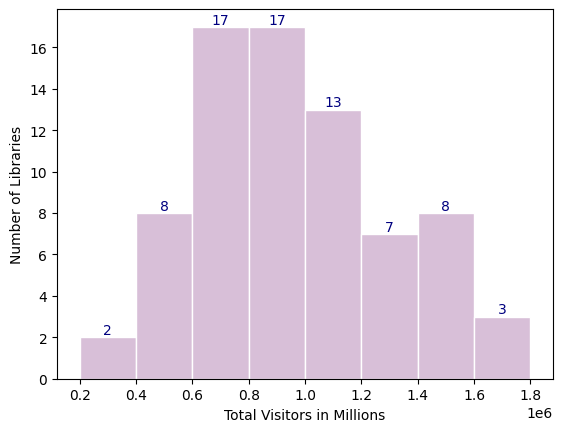

<Figure size 1500x1000 with 0 Axes>

In [215]:
binwidth = 200_000
values, bins, bars = plt.hist(branchSums['VISITORS'], bins=range(200_000, 2_000_000, binwidth),
         edgecolor="white", color="thistle")
plt.xlabel("Total Visitors in Millions")
plt.ylabel("Number of Libraries")
plt.title = ('Library Total Visitors')
plt.bar_label(bars, fontsize=10, color='navy')
plt.figure(figsize=(15, 10))
plt.show()

## Circulation Sums

In [186]:
print(min(branchSums['CIRCULATION']))
print(max(branchSums['CIRCULATION']))
print(branchSums['CIRCULATION'].mean())

56308.0
7589593.0
803890.4320987654


In [132]:
outliers = branchSums[(branchSums['CIRCULATION'] > 1_800_000) | (branchSums['CIRCULATION'] < 100_000)]
outliers

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
1,Altgeld,68576.0,224309.0,530982.0
30,Harold Washington Library Center,7589593.0,3308510.0,14914209.0
39,Lincoln Belmont,1892566.0,212840.0,1644995.0
64,Sulzer Regional,5212564.0,1080199.0,4672243.0
70,Water Works,56308.0,2818.0,74173.0


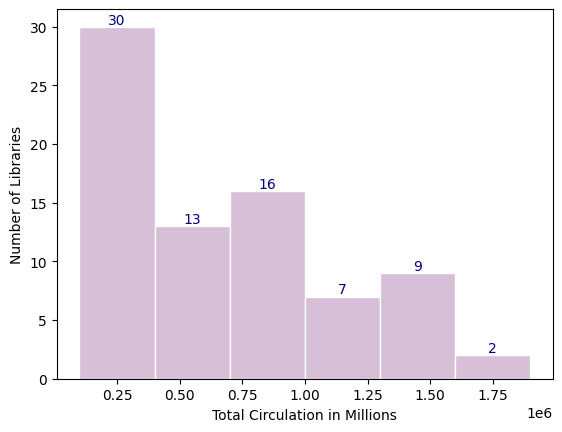

<Figure size 1500x1000 with 0 Axes>

In [217]:
binwidth = 300_000
values, bins, bars = plt.hist(branchSums['CIRCULATION'], bins=range(100_000, 2_000_000, binwidth),
         edgecolor="white", color="thistle")
plt.xlabel("Total Circulation in Millions")
plt.ylabel("Number of Libraries")
plt.title = ('Library Total Visitors')
plt.bar_label(bars, fontsize=10, color='navy')
plt.figure(figsize=(15, 10))
plt.show()

## Computer Use Sums

In [138]:
print(min(branchSums['COMPUTER_SESSIONS']))
print(max(branchSums['COMPUTER_SESSIONS']))
print(branchSums['COMPUTER_SESSIONS'].mean())

2818.0
3308510.0
294898.81481481483


In [174]:
outliers = branchSums[(branchSums['COMPUTER_SESSIONS'] > 500_000) | (branchSums['COMPUTER_SESSIONS'] < 50_000)]
outliers

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
30,Harold Washington Library Center,7589593.0,3308510.0,14914209.0
41,Little Italy,207070.0,39080.0,326181.0
64,Sulzer Regional,5212564.0,1080199.0,4672243.0
70,Water Works,56308.0,2818.0,74173.0
75,West Loop,213047.0,17853.0,232539.0
79,Woodson Regional,832263.0,1111030.0,2890069.0


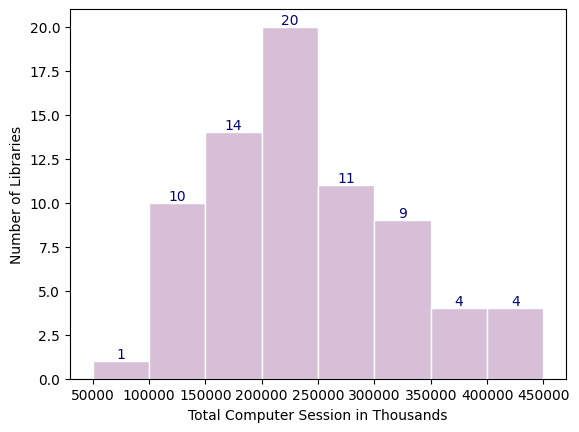

<Figure size 1500x1000 with 0 Axes>

In [187]:
binwidth = 50_000
values, bins, bars = plt.hist(branchSums['COMPUTER_SESSIONS'], bins=range(50_000, 500_000, binwidth),
         edgecolor="white", color="thistle")
plt.xlabel("Total Computer Session in Thousands")
plt.ylabel("Number of Libraries")
plt.title = ('Library Total Visitors')
plt.bar_label(bars, fontsize=10, color='navy')
plt.figure(figsize=(15, 10))
plt.show()

# Averages

## Visitor Averages

In [192]:
print(min(branchAvg['VISITORS']))
print(max(branchAvg['VISITORS']))
print(branchAvg['VISITORS'].mean())

3479.06106870229
102152.11643835617
8801.557546823242


In [209]:
outliers = branchAvg[(branchAvg['VISITORS'] > 15_000) | (branchAvg['VISITORS'] < 3_000)]
outliers

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
17,Chinatown,8831.118056,2600.236111,18653.326389
30,Harold Washington Library Center,51983.513699,22661.027397,102152.116438
64,Sulzer Regional,35702.493151,7398.623288,32001.664384
79,Woodson Regional,6305.022727,8416.893939,21894.462121


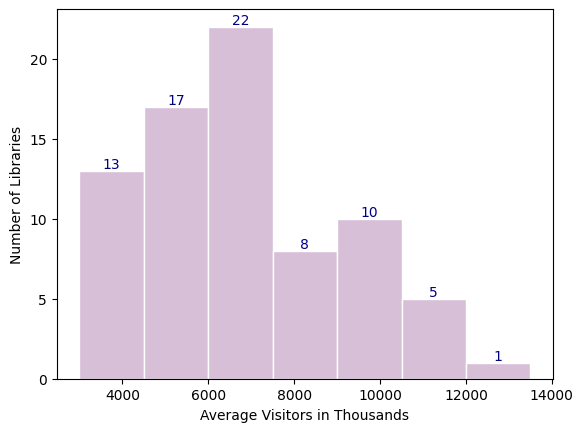

<Figure size 1500x1000 with 0 Axes>

In [213]:
binwidth = 1500
values, bins, bars = plt.hist(branchAvg['VISITORS'], bins=range(3_000, 15_000, binwidth),
         edgecolor="white", color="thistle")
plt.xlabel("Average Visitors in Thousands")
plt.ylabel("Number of Libraries")
plt.title = ('Library Total Visitors')
plt.bar_label(bars, fontsize=10, color='navy')
plt.figure(figsize=(15, 10))
plt.show()

## Computer Use Average

In [218]:
print(min(branchAvg['COMPUTER_SESSIONS']))
print(max(branchAvg['COMPUTER_SESSIONS']))
print(branchAvg['COMPUTER_SESSIONS'].mean())

148.31578947368422
22661.027397260274
2106.4270994658455


In [219]:
outliers = branchAvg[(branchAvg['COMPUTER_SESSIONS'] > 500_000) | (branchAvg['COMPUTER_SESSIONS'] < 50_000)]
outliers

,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,8497.414634,1912.178862,9948.024390
1,Altgeld,493.352518,1613.733813,3820.014388
2,Archer Heights,5551.904110,1566.739726,7432.568493
3,Austin,1429.697183,1594.154930,6193.929577
4,Austin-Irving,9457.856164,1489.301370,8398.445205
...,...,...,...,...
76,West Pullman,2045.561644,2427.527397,6339.547945
77,West Town,6450.417808,2264.849315,9187.965753
78,"Whitney M. Young, Jr.",2005.679389,2664.496183,7148.007634
79,Woodson Regional,6305.022727,8416.893939,21894.462121
